<a href="https://colab.research.google.com/github/KithusshandR/ML_Assignment2_IT19029832_IT19241760_IT19121802/blob/Development/Multiple_Regression_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
auto_prices = pd.read_csv('/content/gdrive/MyDrive/content/AutomobilePriceDataRaw.csv')
auto_prices.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
auto_prices.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [ ]:
auto_prices.columns = [col.replace('-', '_') for col in auto_prices.columns]

In [ ]:
auto_prices.head(5)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
auto_prices.shape

(205, 26)

In [ ]:
import numpy as np

(auto_prices.astype(np.object) == "?").any()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


symboling            False
normalized_losses     True
make                 False
fuel_type            False
aspiration           False
num_of_doors          True
body_style           False
drive_wheels         False
engine_location      False
wheel_base           False
length               False
width                False
height               False
curb_weight          False
engine_type          False
num_of_cylinders     False
engine_size          False
fuel_system          False
bore                  True
stroke                True
compression_ratio    False
horsepower            True
peak_rpm              True
city_mpg             False
highway_mpg          False
price                 True
dtype: bool

In [ ]:
auto_prices.dtypes

symboling              int64
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower             int64
peak_rpm               int64
city_mpg               int64
highway_mpg            int64
price                  int64
dtype: object

In [ ]:
for column in auto_prices.columns:
  if auto_prices[column].dtype == object:
    count = 0
    count = [count + 1 for v in auto_prices[column] if v == '?']
    print(column + ' ' + str(sum(count)))

normalized_losses 41
make 0
fuel_type 0
aspiration 0
num_of_doors 2
body_style 0
drive_wheels 0
engine_location 0
engine_type 0
num_of_cylinders 0
fuel_system 0
bore 4
stroke 4
horsepower 2
peak_rpm 2
price 4


In [ ]:
auto_prices.drop('normalized_losses', axis=1, inplace=True)

In [ ]:
auto_prices.shape

(205, 25)

In [ ]:
columns = ['price', 'bore', 'stroke' , 'horsepower', 'peak_rpm']

for column in columns:
  auto_prices.loc[auto_prices[column] == '?', column] = np.nan

In [ ]:
auto_prices.dropna(axis=0, inplace=True)
auto_prices.shape

(195, 25)

In [ ]:
for column in columns:
  auto_prices[column] = pd.to_numeric(auto_prices[column])

In [ ]:
auto_prices.dtypes

symboling              int64
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower             int64
peak_rpm               int64
city_mpg               int64
highway_mpg            int64
price                  int64
dtype: object

In [ ]:
auto_prices['num_of_cylinders'].value_counts()

four      155
six        24
five       10
eight       4
three       1
twelve      1
Name: num_of_cylinders, dtype: int64

In [ ]:
new_cylinder_dictionary = {'three':'three_four', 'four':'three_four', 'five':'five_six', 'six':'five_six','eight':'eight_twelve','twelve':'eight_twelve'}

auto_prices['num_of_cylinders'] = [ new_cylinder_dictionary[v] for v in auto_prices['num_of_cylinders']]
auto_prices['num_of_cylinders'].value_counts()

three_four      156
five_six         34
eight_twelve      5
Name: num_of_cylinders, dtype: int64

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


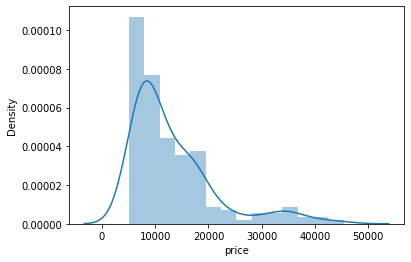

In [ ]:
sns.distplot(auto_prices['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


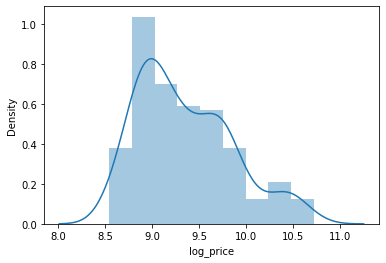

In [ ]:
auto_prices['log_price'] = np.log(auto_prices['price'])
sns.distplot(auto_prices['log_price'])